# [Lab Session 3](fourier.ipynb)


In [108]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


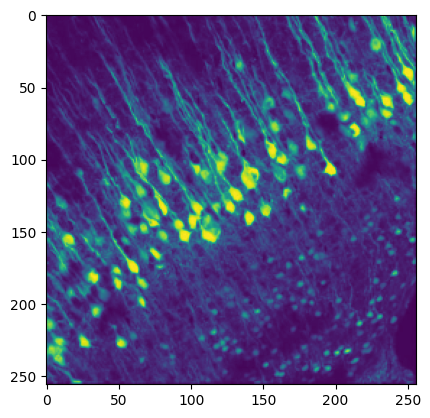

In [109]:
img = plt.imread('data/cells.png')
cell_img=resize(img,(256,256))
plt.imshow(cell_img)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [110]:
cell_ft = np.fft.fft2(cell_img)


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [111]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)


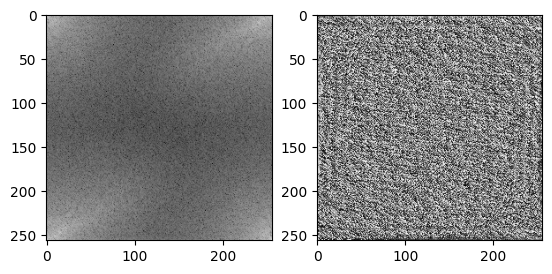

In [112]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


In [113]:
cell_shift = np.fft.fftshift(cell_ft)

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


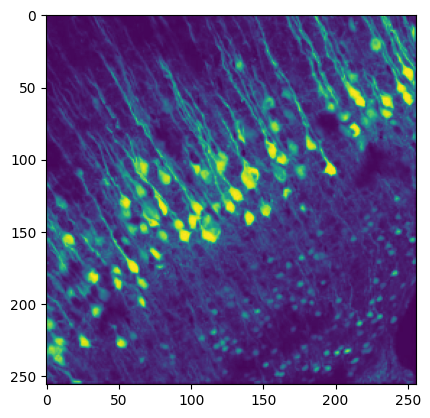

In [114]:
cell_ishift = np.fft.ifftshift(cell_shift)
cell_ift=np.fft.ifft2(cell_ishift)
plt.imshow(cell_ift.real)

---


**[Task 2 (a).]()** Load the brain CT image.


In [115]:
brain= plt.imread('data/brain_ct.png')


**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [116]:
brain_ft=np.fft.fft2(brain)
brain_shift=np.fft.fftshift(brain_ft)
amplitude = np.abs(brain_shift)
phase= np.angle(brain_shift)
print(amplitude)
print(phase)

[[0.05490288 0.26270832 0.60190397 ... 0.14756256 0.60190397 0.26270832]
 [0.64718567 1.28339019 1.3369172  ... 1.07468587 0.2250654  0.57566645]
 [0.21272219 0.08995001 0.94786378 ... 2.39375869 0.20702503 1.88912114]
 ...
 [2.20951108 1.93835153 0.53347894 ... 0.46849406 1.22298775 2.86805613]
 [0.21272219 1.88912114 0.20702503 ... 0.91037167 0.94786378 0.08995001]
 [0.64718567 0.57566645 0.2250654  ... 1.45920647 1.3369172  1.28339019]]
[[ 3.14159265  0.31098031 -2.5410971  ... -1.12424691  2.5410971
  -0.31098031]
 [ 2.17670467 -0.92660117 -1.65357134 ... -2.09504328  1.15744539
  -0.21287903]
 [ 0.01957161 -1.10187737  1.2311335  ... -0.30720684  2.78974829
   1.98036941]
 ...
 [-1.09784437  2.87743024 -3.12905755 ...  0.96974061  1.64367346
   0.31897728]
 [-0.01957161 -1.98036941 -2.78974829 ...  2.61651448 -1.2311335
   1.10187737]
 [-2.17670467  0.21287903 -1.15744539 ... -2.61085914  1.65357134
   0.92660117]]


In [117]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


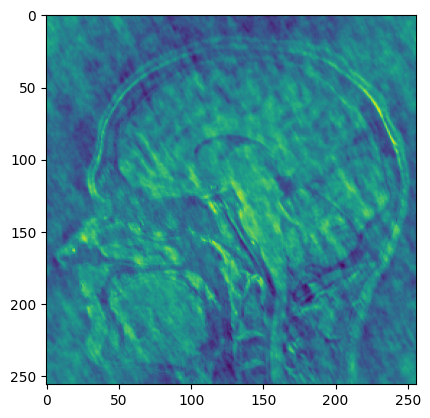

In [118]:
amplitude_cell=np.abs(cell_shift)
phase_brain=phase

merged_shifted=to_complex_array(amplitude_cell, phase_brain)
#to_complex_array(phase_brain)

merged_ishifted = np.fft.ifftshift(merged_shifted)
merged_ift=np.fft.ifft2(merged_ishifted)
plt.imshow(merged_ift.real)


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


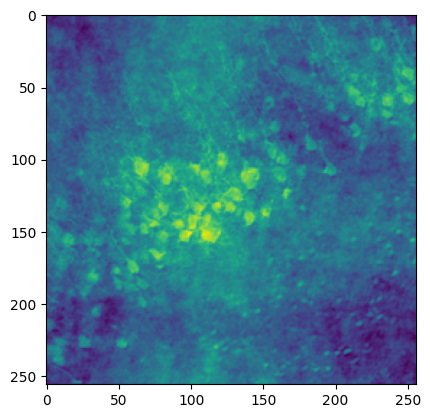

In [119]:
phase_cell=np.angle(cell_shift)
amplitude_brain=amplitude

merged_shifted2=to_complex_array(amplitude_brain, phase_cell)
#to_complex_array(phase_brain)

merged_ishifted2 = np.fft.ifftshift(merged_shifted2)
merged_ift2=np.fft.ifft2(merged_ishifted2)
plt.imshow(merged_ift2.real)

---


**[Task 3 (a).]()** Create a lowpass filter mask.


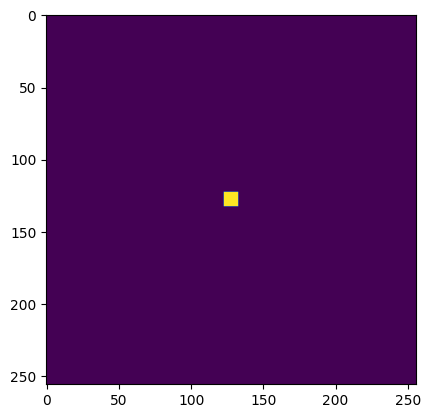

In [125]:
filter_window_size = 50
r=40
array_zeros=np.zeros_like(brain)
x=103+(r//2)
for i in range(filter_window_size-r):
    y=103+(r//2)
    for i in range(filter_window_size-r):
        array_zeros[x,y]=1
        y=y+1
    x= x+1    

plt.imshow(array_zeros)
lowpass=array_zeros
#print(array_zeros[103,103])

**[Task 3 (b).]()** Create a highpass filter maks.


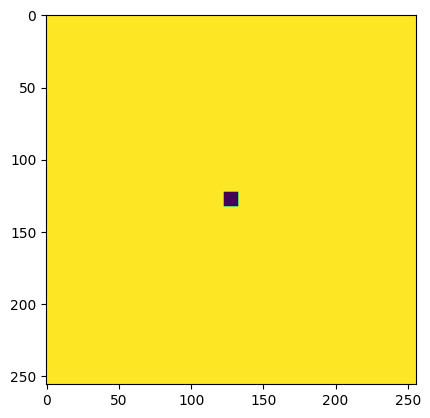

In [121]:
highpass=1-lowpass
plt.imshow(highpass)

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_32992/3942311684.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_amp))
/tmp/ipykernel_32992/3942311684.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_amp))


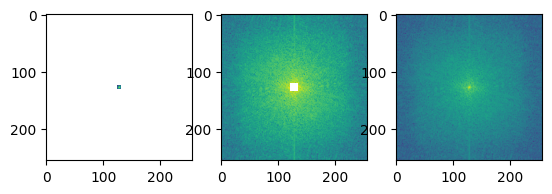

In [122]:
high_amp=amplitude_brain*lowpass
low_amp=amplitude_brain*highpass
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.log(high_amp))
plt.subplot(1,3,2)
plt.imshow(np.log(low_amp))
plt.subplot(1,3,3)
plt.imshow(np.log(amplitude_brain))

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


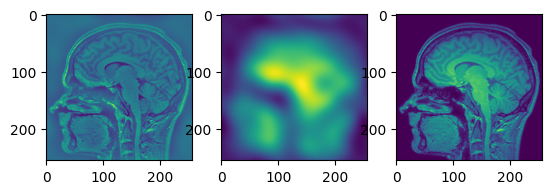

In [123]:
#brain_low=to_complex_array(low_amp, phase)
#brain_high=to_complex_array(high_amp, phase)

merged_shifted3=to_complex_array(low_amp, phase)
#to_complex_array(phase_brain)
merged_shifted4=to_complex_array(high_amp, phase)
#to_complex_array(phase_brain)

merged_ishifted3 = np.fft.ifftshift(merged_shifted3)
merged_ift3=np.fft.ifft2(merged_ishifted3)
#plt.imshow(merged_ift3.real)

merged_ishifted4 = np.fft.ifftshift(merged_shifted4)
merged_ift4=np.fft.ifft2(merged_ishifted4)
#plt.imshow(merged_ift4.real)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(merged_ift3.real)
plt.subplot(1,3,2)
plt.imshow(merged_ift4.real)
plt.subplot(1,3,3)
plt.imshow(brain)

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [ ]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
